In [209]:
%matplotlib inline
import pandas as pd
import os
import os.path
import itertools
import matplotlib.pyplot as plt
import math

import pprint as pp
import numpy as np

## 1.  LOAD DATA

In [210]:
DATA_PATH = os.path.abspath(os.path.join(os.curdir, "data"))
GINI_FILE = "1-gini.csv"
Year_in_school = "Years in school men 25-34.csv"
COUNTRIES_FILE = "3-countries.csv"

gini_df = pd.read_csv(os.path.join(DATA_PATH, GINI_FILE))
Year_in_school_df = pd.read_csv(os.path.join(DATA_PATH, Year_in_school), sep=";")
countries_df = pd.read_csv(os.path.join(DATA_PATH, COUNTRIES_FILE), sep=";", usecols = ['Country (en)', "Continent"])


## 2. PREPARE DATA

### 2.1 Data selection

In [211]:
gini_df = gini_df.rename(columns={"GINI index": "country"})
Year_in_school_df = Year_in_school_df.rename(columns ={"Row Labels" :"country"})
countries_df = countries_df.rename(columns ={"Country (en)" :"country"})
Year_in_school_df.head(3)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,1,"1,1","1,1","1,2","1,3","1,3","1,4","1,4","1,5",...,"2,8","2,9","2,9",3,3,"3,1","3,1","3,2","3,3","3,3"
1,Albania,"6,5","6,7","6,9",7,"7,2","7,3","7,5","7,7","7,8",...,"10,4","10,4","10,5","10,6","10,7","10,7","10,8","10,9","10,9",11
2,Algeria,"1,9",2,"2,1","2,2","2,3","2,4","2,5","2,7","2,8",...,"6,3","6,5","6,6","6,7","6,8",7,"7,1","7,2","7,3","7,3"


### 2.2 Load countries data

In [212]:
# vérification du nombre de pays dans chacune des dataframes

print ("Nombre de pays dans countries_df est {}".format (len(list (countries_df["country"].unique()))))
print ("Nombre de pays dans gini_df est {}".format (len(list (gini_df["country"].unique()))))
print ("Nombre de pays dans Year_in_school_df est {}".format (len(list (Year_in_school_df["country"].unique()))))

Nombre de pays dans countries_df est 248
Nombre de pays dans gini_df est 227
Nombre de pays dans Year_in_school_df est 175


In [213]:
# Récupère le continent auquel appartient chaque pays

gini_df_complet =pd.merge(gini_df, countries_df, on='country', how='outer')
gini_df_complet_cols = gini_df_complet.columns.tolist()
gini_df_complet_cols = gini_df_complet_cols[-1:] + gini_df_complet_cols[:-1]
gini_df_complet = gini_df_complet[gini_df_complet_cols]

Year_in_school_df_complet = pd.merge(Year_in_school_df, countries_df, on='country', how='outer')
Year_in_school_df_complet_cols = Year_in_school_df_complet.columns.tolist()

Year_in_school_df_complet_cols = Year_in_school_df_complet_cols[-1:] + Year_in_school_df_complet_cols[:-1]
Year_in_school_df_complet = Year_in_school_df_complet[Year_in_school_df_complet_cols]

Year_in_school_df_complet.head(3)

,Continent,country,1970,1971,1972,1973,1974,1975,1976,1977,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Asia,Afghanistan,1,"1,1","1,1","1,2","1,3","1,3","1,4","1,4",...,"2,8","2,9","2,9",3,3,"3,1","3,1","3,2","3,3","3,3"
1,Europe,Albania,"6,5","6,7","6,9",7,"7,2","7,3","7,5","7,7",...,"10,4","10,4","10,5","10,6","10,7","10,7","10,8","10,9","10,9",11
2,Africa,Algeria,"1,9",2,"2,1","2,2","2,3","2,4","2,5","2,7",...,"6,3","6,5","6,6","6,7","6,8",7,"7,1","7,2","7,3","7,3"


In [214]:
#gini_df_complet.head(3)

In [215]:
gini_df_complet.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,275,276,277,278,279,280,281,282,283,284
Continent,Asia,Europe,Africa,Oceania,Europe,Africa,North America,South America,Asia,North America,...,Asia,Oceania,Europe,North America,Oceania,Europe,Oceania,Australia,Africa,Africa
country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Taiwan,Tokelau,Czech Republic,Turks and Caicos Islands,Tuvalu,Holy See (Vatican City),Wallis and Futuna,Christmas Island,Western Sahara,Central African Republic
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
# garder les méme colonnes 
print("Dimensions initiales ...")
print("   Taille gini colonnes : ", str(len(gini_df_complet.columns.values)))
print("   Taille year school colonnes : ", str(len(Year_in_school_df_complet.columns.values)))
print()

gini_not_in_year_school = [ colonne for colonne in gini_df_complet.columns.values if colonne not in Year_in_school_df_complet.columns.values ]

year_school_not_in_gini = [ colonne  for colonne in Year_in_school_df_complet.columns.values if colonne not in gini_df_complet.columns.values ]

print ("colonnes dans gini et pas dans mean year school {}".format(gini_not_in_year_school))
print ("colonnes dans mean year school et pas dans gini {}".format(year_school_not_in_gini))

print("Suppression des colonnes non communes ...")

gini_df_complet = gini_df_complet.drop(gini_not_in_year_school, axis = 1 )
Year_in_school_df_complet = Year_in_school_df_complet.drop(year_school_not_in_gini, axis = 1 )

print("\nDimensions finales")
print("    Taille gini colonnes : ", str(len(gini_df_complet.columns.values)))
print("    Taille year school colonnes : ", str(len(Year_in_school_df_complet.columns.values)))

Dimensions initiales ...
   Taille gini colonnes :  32
   Taille year school colonnes :  42

colonnes dans gini et pas dans mean year school []
colonnes dans mean year school et pas dans gini ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '2008', '2009']
Suppression des colonnes non communes ...

Dimensions finales
    Taille gini colonnes :  32
    Taille year school colonnes :  32


In [217]:
gini_df_complet = gini_df_complet.transpose()


gini_df_complet.drop(gini_df_complet.index[0],inplace =True)
gini_df_complet.columns = gini_df_complet.iloc[0]
gini_df_complet.drop(gini_df_complet.index[0], inplace=True)

gini_df_complet.head(3)



country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Taiwan,Tokelau,Czech Republic,Turks and Caicos Islands,Tuvalu,Holy See (Vatican City),Wallis and Futuna,Christmas Island,Western Sahara,Central African Republic
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
gini_df_complet.shape

(30, 285)

In [219]:
Year_in_school_df_complet = Year_in_school_df_complet.transpose()


In [220]:
Year_in_school_df_complet.drop(Year_in_school_df_complet.index[0],inplace =True)
Year_in_school_df_complet.columns = Year_in_school_df_complet.iloc[0]
Year_in_school_df_complet.drop(Year_in_school_df_complet.index[0], inplace=True)
Year_in_school_df_complet.head()

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Svalbard,Tokelau,Czech Republic,Turks and Caicos Islands,Tuvalu,Holy See (Vatican City),Wallis and Futuna,Christmas Island,Western Sahara,Central African Republic
1978,"1,5","7,8","2,8","3,2","9,5","8,1",9,"10,8","10,2","9,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,"1,6",8,"2,9","3,4","9,6","8,2","9,1","10,9","10,3","9,3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,"1,6","8,1","3,1","3,5","9,8","8,4","9,2",11,"10,4","9,4",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,"1,7","8,3","3,3","3,6",10,"8,5","9,4",11,"10,4","9,6",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,"1,8","8,4","3,4","3,8","10,2","8,6","9,5","11,1","10,5","9,7",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
print("Dimensions initiales ...")
print("   Taille gini colonnes : ", str(len(gini_df_complet.columns.values)))
print("   Taille year school colonnes : ", str(len(Year_in_school_df_complet.columns.values)))
print()

gini_not_in_year_school = [ colonne for colonne in gini_df_complet.columns.values if colonne not in Year_in_school_df_complet.columns.values ]

year_school_not_in_gini = [ colonne  for colonne in Year_in_school_df_complet.columns.values if colonne not in gini_df_complet.columns.values ]

print ("colonnes dans gini et pas dans mean year school {}".format(gini_not_in_year_school))
print ("colonnes dans mean year school et pas dans gini {}".format(year_school_not_in_gini))

print("Suppression des colonnes non communes ...")

gini_df_complet = gini_df_complet.drop(gini_not_in_year_school, axis = 1 )
Year_in_school_df_complet = Year_in_school_df_complet.drop(year_school_not_in_gini, axis = 1 )

print("\nDimensions finales")
print("    Taille gini colonnes : ", str(len(gini_df_complet.columns.values)))
print("    Taille year school colonnes : ", str(len(Year_in_school_df_complet.columns.values)))

Dimensions initiales ...
   Taille gini colonnes :  285
   Taille year school colonnes :  260

colonnes dans gini et pas dans mean year school ['Channel Islands', 'East Asia & Pacific', 'Euro area', 'Europe & Central Asia', 'Faeroe Islands', 'Heavily indebted poor countries (HIPC)', 'High income', 'High income: nonOECD', 'High income: OECD', 'Hong Kong, China', 'Korea, Dem. Rep.', 'Latin America & Caribbean', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Macao, China', 'Micronesia, Fed. Sts.', 'Middle East & North Africa', 'Middle income', 'South Asia', 'Sub-Saharan Africa', 'Upper middle income', 'Virgin Islands (U.S.)', 'World']
colonnes dans mean year school et pas dans gini []
Suppression des colonnes non communes ...

Dimensions finales
    Taille gini colonnes :  260
    Taille year school colonnes :  260


In [222]:
gini_df_complet.head()

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Taiwan,Tokelau,Czech Republic,Turks and Caicos Islands,Tuvalu,Holy See (Vatican City),Wallis and Futuna,Christmas Island,Western Sahara,Central African Republic
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
gini_df_complet = gini_df_complet.stack()
gini_df_complet = gini_df_complet.to_frame().reset_index()
gini_df_complet = gini_df_complet.rename(columns= {0: 'gini' ,'level_0':'year'})
gini_df_complet.shape

(514, 3)

In [228]:
gini_df_complet.head()

,year,country,gini
0,1979,Panama,48.74
1,1980,Madagascar,46.85
2,1981,Brazil,57.48
3,1981,Costa Rica,47.49
4,1981,Thailand,45.22


In [225]:
Year_in_school_df_complet = Year_in_school_df_complet.stack()
Year_in_school_df_complet = Year_in_school_df_complet.to_frame().reset_index()
Year_in_school_df_complet = Year_in_school_df_complet.rename(columns= {0: 'mean' ,'level_0':'year'})
Year_in_school_df_complet.shape

(5250, 3)

In [234]:
def remove_comma(s):
    """
    Remplace les virgules d'une chaîne de caractères par des points.
    Utile pour les nombres décimaux écrits avec une virgule qui devront être castés de String vers Float
    """
    if not (type(s) is str or type(s) is np.str_):
        # just returns it untouched
        return s
    return s.replace(",", ".")

Year_in_school_df_complet.head()

,year,country,mean
0,1978,Afghanistan,"1,5"
1,1978,Albania,"7,8"
2,1978,Algeria,"2,8"
3,1978,Angola,"3,2"
4,1978,Antigua and Barbuda,"9,5"


In [265]:
result = pd.merge(Year_in_school_df_complet, gini_df_complet,  how='inner', on=['year','country'])
result["mean"] =result["mean"].apply(remove_comma)
result["gini"] = result["gini"].apply(int)
result["mean"] = result["mean"].apply(float)
result.head()

,year,country,mean,gini
0,1979,Panama,7.6,48
1,1980,Madagascar,3.6,46
2,1981,Brazil,4.7,57
3,1981,Costa Rica,6.8,47
4,1981,Thailand,6.3,45


In [273]:
max(result["gini"])

74

/Users/khouiyadam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


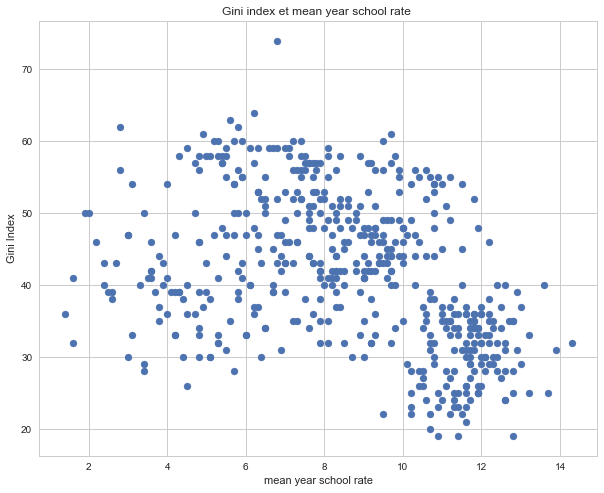

In [266]:
import seaborn as sns
plt.figure(figsize=(10,8))
plt.scatter( result["mean"].values , result["gini"].values, marker='o' )
plt.xlabel("mean year school rate")
plt.ylabel("Gini Index")
plt.title("Gini index et mean year school rate ")
plt.legend()
plt.show()

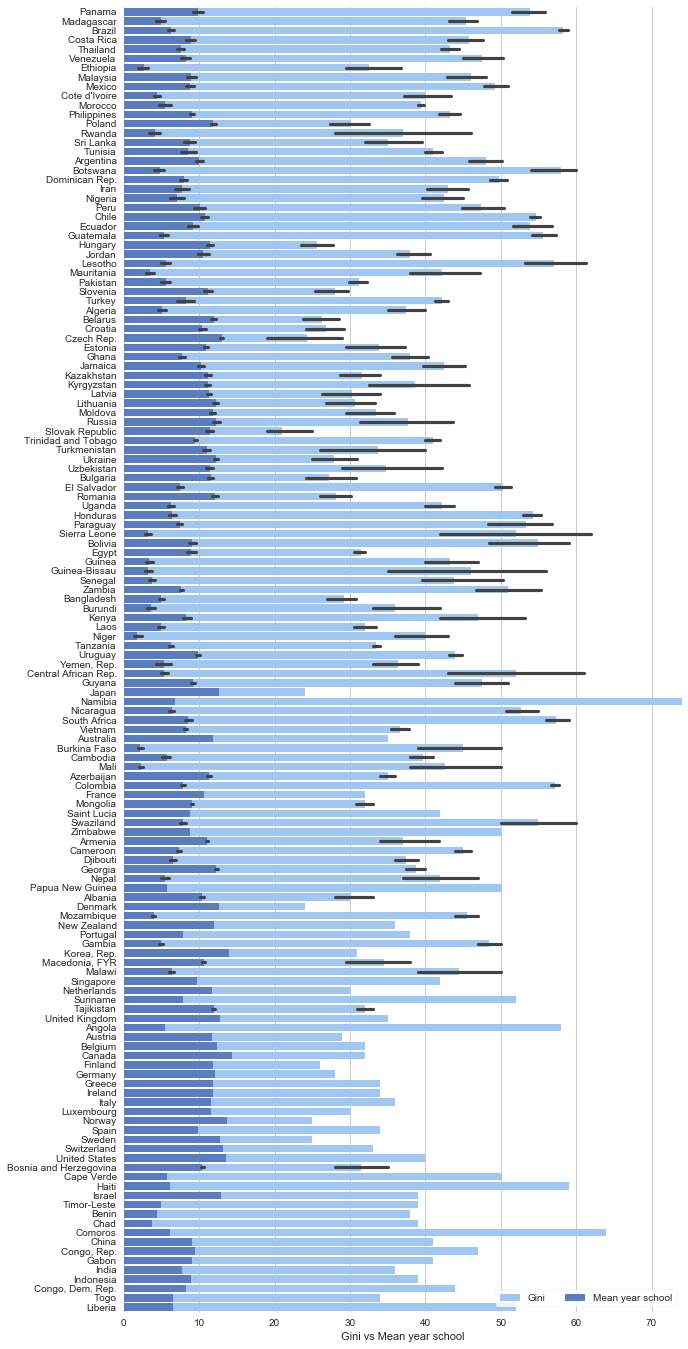

In [274]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 24))
sns.set_color_codes("pastel")
sns.barplot(x="gini", y="country", data=result,label="Gini", color="b")

sns.set_color_codes("muted")
sns.barplot(x="mean", y="country", data=result,label="Mean year school", color="b")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, max(result["gini"])), ylabel="",xlabel="Gini vs Mean year school")
sns.despine(left=True, bottom=True)